In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === FILE SETUP ===
file_map = {
    "2016": "d16_v4.csv",
    "2017": "d17_v4.csv",
    "2018": "d18_v4.csv",
    "2019": "d19_v4.csv",
    "2020": "d20_v4.csv",
    "2021": "d21_v4.csv",
    "2022": "d22_v4.csv",
    "2023": "d23_v4.csv"
}

# === SUBSTANCES ===
top_substances = [
    "Indeno(1,2,3-cd)pyrene",
    "Benzo(a)pyrene",
    "Cypermethrin",
    "Fluoranthene",
    "Copper"
]

# === LOAD & COMBINE DATA ===
dfs = []
for year, file in file_map.items():
    df = pd.read_csv(file)
    df["YEAR"] = int(year)
    dfs.append(df)

full_df = pd.concat(dfs, ignore_index=True)

# Clean columns
full_df.columns = full_df.columns.str.strip()
full_df["SUBSTANCE NAME"] = full_df["SUBSTANCE NAME"].astype(str).str.strip()
full_df["REGION"] = full_df["REGION"].astype(str).str.strip()
full_df["QUANTITY RELEASED (kg)"] = pd.to_numeric(full_df["QUANTITY RELEASED (kg)"], errors='coerce')

########################################################################################################
# Define PNEC values in µg/L
pnec_dict = {
    "indeno(1,2,3-cd)pyrene": 0.00017,
    "benzo(a)pyrene": 0.00017,
    "cypermethrin": 3e-05,
    "fluoranthene": 0.000762,
    "copper": 1.0
}

# Standardize substance names in full_df
full_df["SUBSTANCE NAME"] = full_df["SUBSTANCE NAME"].astype(str).str.strip().str.lower()

# Convert quantity released to litres of water needed to dilute to PNEC level
def compute_toxicity_proxy(row):
    substance = row["SUBSTANCE NAME"]
    quantity_kg = row["QUANTITY RELEASED (kg)"]
    pnec = pnec_dict.get(substance)
    if pd.notna(quantity_kg) and substance in pnec_dict:
        return (quantity_kg * 1e9) / pnec  # kg to µg, then divide by PNEC
    return None

full_df["TOXIC LITRES REQUIRED"] = full_df.apply(compute_toxicity_proxy, axis=1)


In [5]:
full_df.head()

,AUTHORISATION ID / PERMIT ID,PRIMARY INDUSTRY ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,...,Longitude,REGION,COUNTY,YEAR,ACTIVITY DESCRIPTION,EA AREA NAME LABEL,ROUTE NAME LABEL,REGULATED INDUSTRY SECTOR LABEL,REGULATED INDUSTRY SUB SECTOR LABEL,TOXIC LITRES REQUIRED
0,AWNNF13399,NaN,Anglian Water,Broadholme STW,NaN,494150.0,268750.0,Lincolnshire and Northamptonshire,Controlled Waters,fluoranthene,...,-0.620468,East Midlands,North Northamptonshire,2016,NaN,NaN,NaN,NaN,NaN,1.706037e+11
1,AWNNF13052,NaN,Anglian Water,Great Billing STW,NaN,483280.0,261550.0,Lincolnshire and Northamptonshire,Controlled Waters,fluoranthene,...,-0.781639,East Midlands,North Northamptonshire,2016,NaN,NaN,NaN,NaN,NaN,2.887139e+11
2,T/48/12074/R,NaN,SEVERN TRENT WATER LTD,Derby Sewage Treatment Works Chp Plant Megalou...,DE21 7BR,438830.0,343470.0,East Midlands,Controlled Waters,fluoranthene,...,-1.423035,East Midlands,Derbyshire,2016,NaN,NaN,NaN,NaN,NaN,3.805774e+11
3,T/64/45170/R,NaN,SEVERN TRENT WATER LTD,Stoke Bardolph STW Nottingham,NG14 5HL,464730.0,342220.0,East Midlands,Controlled Waters,fluoranthene,...,-1.037525,East Midlands,Nottinghamshire,2016,NaN,NaN,NaN,NaN,NaN,6.824147e+11
4,T/53/45014/R,NaN,SEVERN TRENT WATER LTD,Wanlip Sewage Treatment Works Fillingate Wanli...,LE7 4PF,459760.0,311500.0,East Midlands,Controlled Waters,fluoranthene,...,-1.117141,East Midlands,Leicestershire,2016,NaN,NaN,NaN,NaN,NaN,6.955381e+11


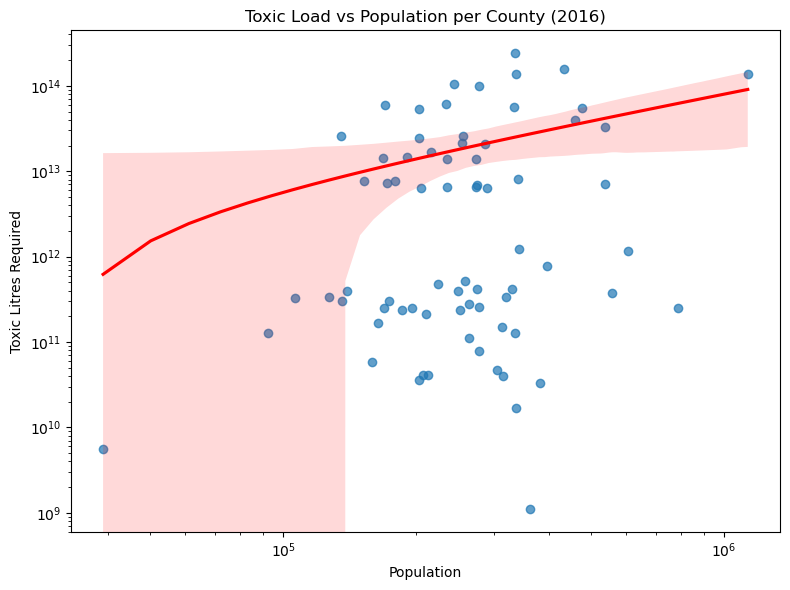


=== OLS Regression Summary for 2016 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.094
Model:                               OLS   Adj. R-squared:                  0.081
Method:                    Least Squares   F-statistic:                     7.274
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):            0.00876
Time:                           17:52:05   Log-Likelihood:                -2359.0
No. Observations:                     72   AIC:                             4722.
Df Residuals:                         70   BIC:                             4727.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

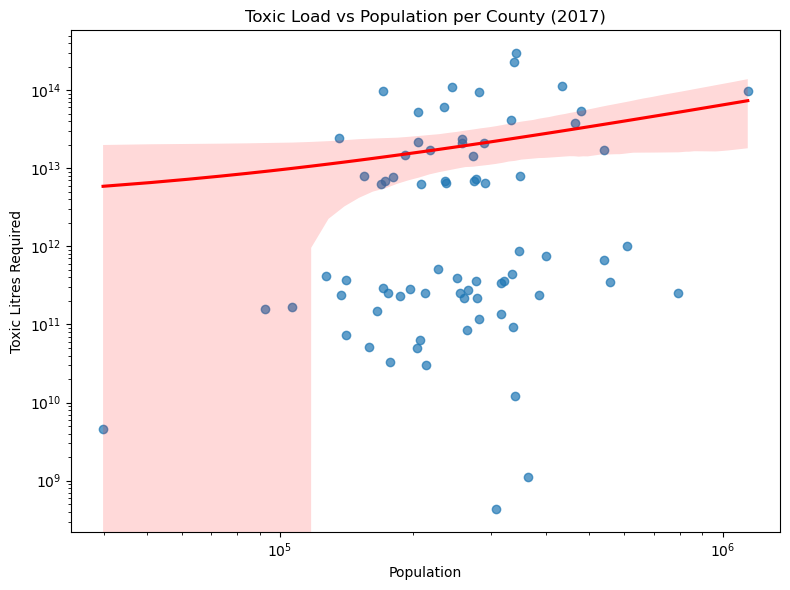


=== OLS Regression Summary for 2017 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.041
Model:                               OLS   Adj. R-squared:                  0.027
Method:                    Least Squares   F-statistic:                     3.039
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):             0.0855
Time:                           17:52:06   Log-Likelihood:                -2436.0
No. Observations:                     74   AIC:                             4876.
Df Residuals:                         72   BIC:                             4881.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

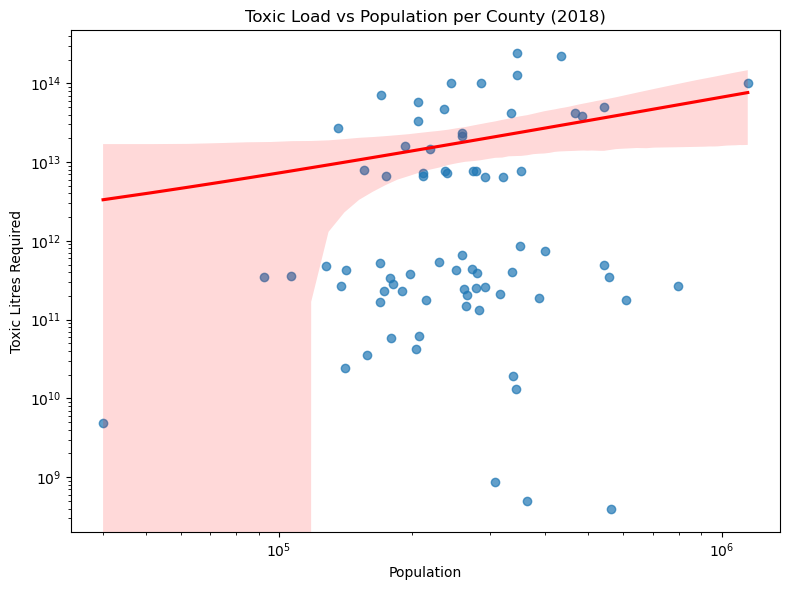


=== OLS Regression Summary for 2018 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.060
Model:                               OLS   Adj. R-squared:                  0.047
Method:                    Least Squares   F-statistic:                     4.585
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):             0.0356
Time:                           17:52:07   Log-Likelihood:                -2428.0
No. Observations:                     74   AIC:                             4860.
Df Residuals:                         72   BIC:                             4865.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

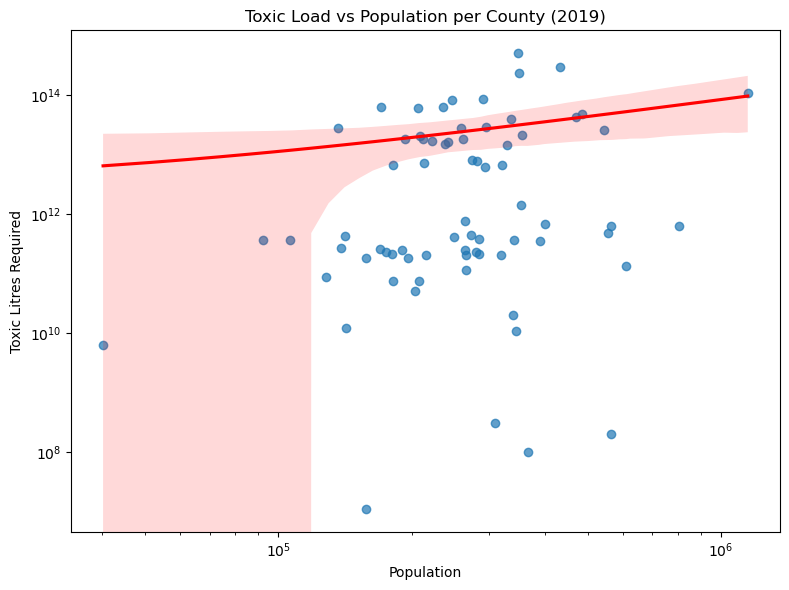


=== OLS Regression Summary for 2019 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.033
Model:                               OLS   Adj. R-squared:                  0.019
Method:                    Least Squares   F-statistic:                     2.380
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):              0.127
Time:                           17:52:07   Log-Likelihood:                -2400.6
No. Observations:                     72   AIC:                             4805.
Df Residuals:                         70   BIC:                             4810.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

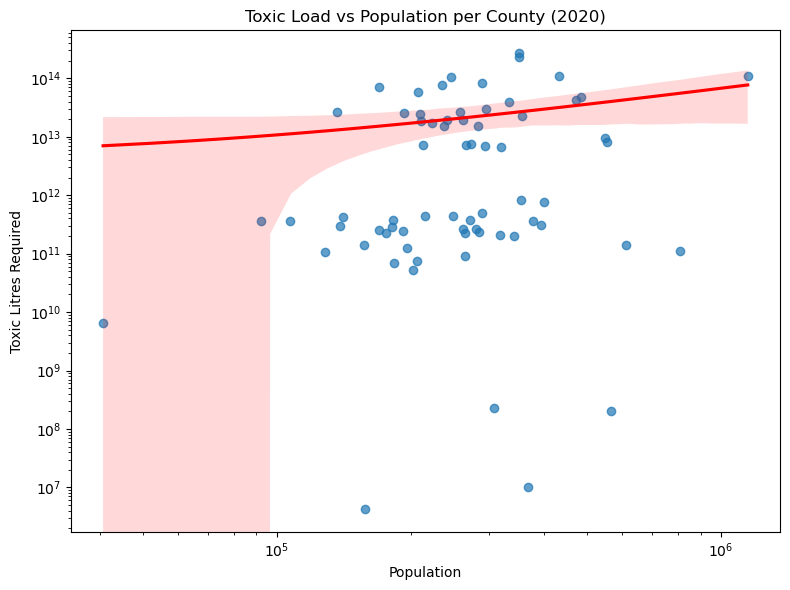


=== OLS Regression Summary for 2020 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.048
Model:                               OLS   Adj. R-squared:                  0.034
Method:                    Least Squares   F-statistic:                     3.330
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):             0.0726
Time:                           17:52:08   Log-Likelihood:                -2237.3
No. Observations:                     68   AIC:                             4479.
Df Residuals:                         66   BIC:                             4483.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

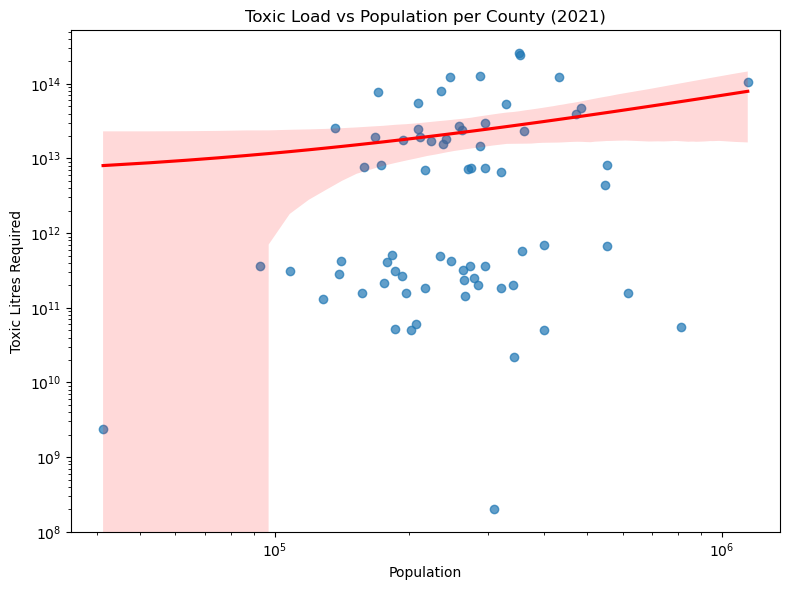


=== OLS Regression Summary for 2021 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.047
Model:                               OLS   Adj. R-squared:                  0.033
Method:                    Least Squares   F-statistic:                     3.322
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):             0.0727
Time:                           17:52:09   Log-Likelihood:                -2305.1
No. Observations:                     70   AIC:                             4614.
Df Residuals:                         68   BIC:                             4619.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

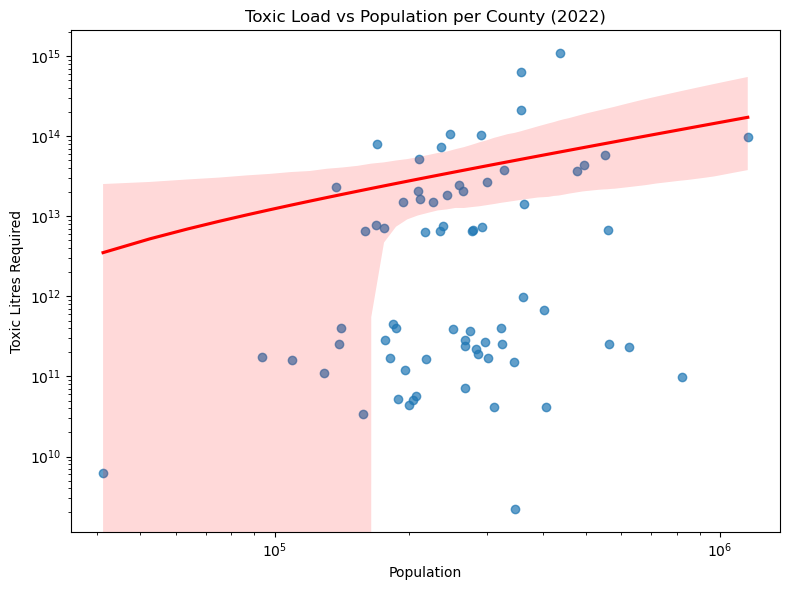


=== OLS Regression Summary for 2022 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.029
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     1.997
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):              0.162
Time:                           17:52:10   Log-Likelihood:                -2383.7
No. Observations:                     70   AIC:                             4771.
Df Residuals:                         68   BIC:                             4776.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

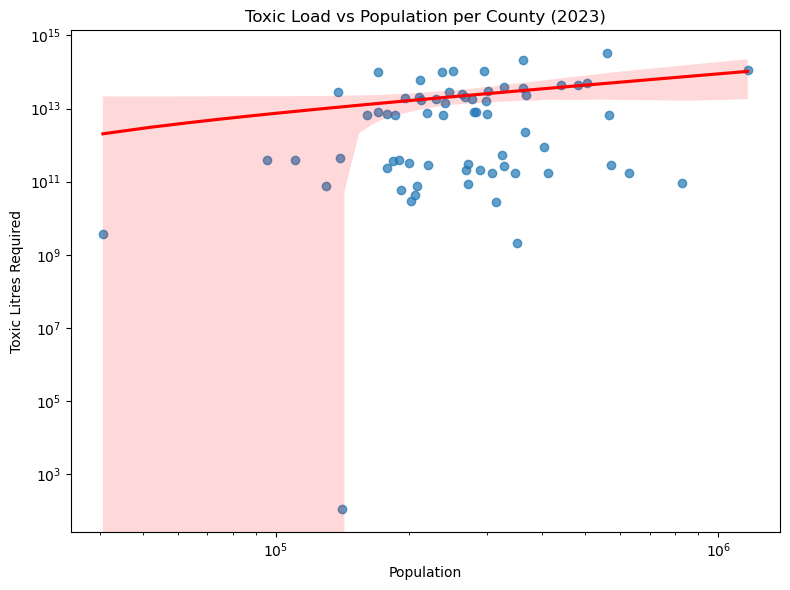


=== OLS Regression Summary for 2023 ===
                              OLS Regression Results                             
Dep. Variable:     TOXIC LITRES REQUIRED   R-squared:                       0.089
Model:                               OLS   Adj. R-squared:                  0.075
Method:                    Least Squares   F-statistic:                     6.324
Date:                   Fri, 04 Jul 2025   Prob (F-statistic):             0.0144
Time:                           17:52:10   Log-Likelihood:                -2208.4
No. Observations:                     67   AIC:                             4421.
Df Residuals:                         65   BIC:                             4425.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# === Load Population Data (starts at row 2) ===
pop_df = pd.read_excel(
    "myebtablesenglandwales20112023.xlsx",
    sheet_name="MYEB3",
    skiprows=1  # starts at row 2
)

# Clean column names
pop_df.columns = pop_df.columns.str.strip()

# Filter population columns from 2016 to 2023
pop_cols = [col for col in pop_df.columns if col.startswith("population_")]
pop_years = [int(col.split("_")[1]) for col in pop_cols if int(col.split("_")[1]) >= 2016]

# Reshape to long format using 'laname23' as county name
pop_df_long = pd.melt(
    pop_df,
    id_vars=["laname23"],
    value_vars=[f"population_{y}" for y in pop_years],
    var_name="Year",
    value_name="Population"
)

# Clean and format population long df
pop_df_long["Year"] = pop_df_long["Year"].str.extract(r"(\d+)").astype(int)
pop_df_long = pop_df_long.rename(columns={"laname23": "COUNTY"})

# === Aggregate Pollution Data ===
# Drop zero or missing values first
full_df = full_df.copy()
full_df = full_df[full_df["TOXIC LITRES REQUIRED"].notna()]
full_df = full_df[full_df["TOXIC LITRES REQUIRED"] > 0]

# Ensure COUNTY column exists and is cleaned
full_df["COUNTY"] = full_df["COUNTY"].astype(str).str.strip()

# Aggregate per county per year
pollution_grouped = full_df.groupby(["COUNTY", "YEAR"])["TOXIC LITRES REQUIRED"].sum().reset_index()
pollution_grouped = pollution_grouped.rename(columns={"YEAR": "Year"})

# === Merge Datasets ===
merged = pd.merge(pollution_grouped, pop_df_long, on=["COUNTY", "Year"], how="inner")

# Ensure numeric columns
merged["Population"] = pd.to_numeric(merged["Population"], errors="coerce")
merged["TOXIC LITRES REQUIRED"] = pd.to_numeric(merged["TOXIC LITRES REQUIRED"], errors="coerce")

# Drop rows with missing or zero values
merged = merged[(merged["Population"] > 0) & (merged["TOXIC LITRES REQUIRED"] > 0)]

# === Plot and Regression per Year ===
for year in sorted(merged["Year"].unique()):
    data = merged[merged["Year"] == year].copy()
    if data.empty:
        continue

    plt.figure(figsize=(8, 6))
    sns.regplot(
        x="Population",
        y="TOXIC LITRES REQUIRED",
        data=data,
        scatter_kws={'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title(f"Toxic Load vs Population per County ({year})")
    plt.xlabel("Population")
    plt.ylabel("Toxic Litres Required")
    plt.yscale("log")
    plt.xscale("log")
    plt.tight_layout()
    plt.show()

    # === Regression ===
    X = sm.add_constant(data["Population"])
    y = data["TOXIC LITRES REQUIRED"]
    model = sm.OLS(y, X).fit()
    print(f"\n=== OLS Regression Summary for {year} ===")
    print(model.summary())


In [10]:
from linearmodels.panel import PanelOLS

# Set up panel data: COUNTY-Year structure
panel_df = merged.set_index(["COUNTY", "Year"]).sort_index()

# Optionally take logs if you want log-log elasticity model
panel_df["log_pollution"] = np.log(panel_df["TOXIC LITRES REQUIRED"])
panel_df["log_population"] = np.log(panel_df["Population"])

# Run fixed effects model
mod = PanelOLS.from_formula("log_pollution ~ log_population + EntityEffects", data=panel_df)
res = mod.fit()
print(res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:          log_pollution   R-squared:                        0.0008
Estimator:                   PanelOLS   R-squared (Between):              0.9830
No. Observations:                 567   R-squared (Within):               0.0008
Date:                Fri, Jul 04 2025   R-squared (Overall):              0.9835
Time:                        17:53:43   Log-likelihood                   -977.39
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.3775
Entities:                          78   P-value                           0.5392
Avg Obs:                       7.2692   Distribution:                   F(1,488)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             0.3775
                            

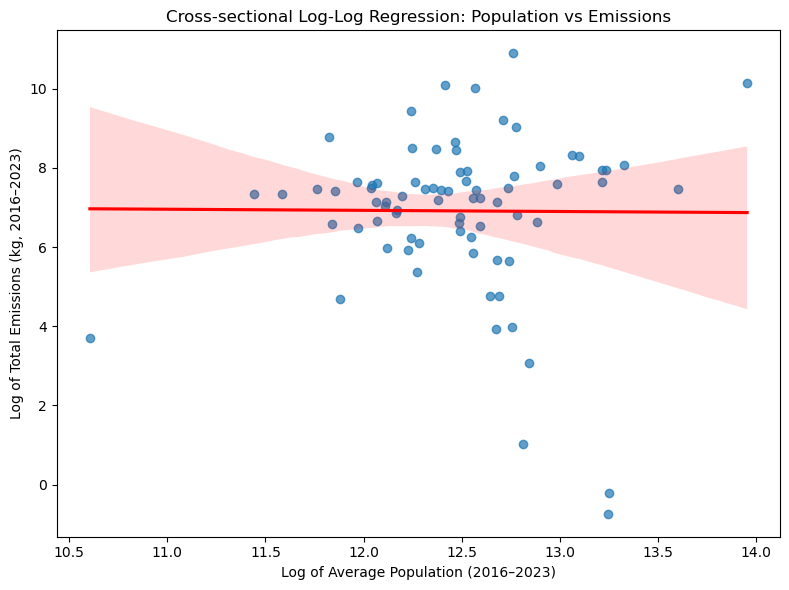

=== Cross-Sectional Log-Log Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:          log_emissions   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                  0.003911
Date:                Fri, 04 Jul 2025   Prob (F-statistic):              0.950
Time:                        18:05:52   Log-Likelihood:                -164.07
No. Observations:                  78   AIC:                             332.1
Df Residuals:                      76   BIC:                             336.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Filter and clean pollution data
poll_df = full_df.copy()
poll_df = poll_df[poll_df["QUANTITY RELEASED (kg)"].notna()]
poll_df = poll_df[poll_df["QUANTITY RELEASED (kg)"] > 0]

# Aggregate total emissions per county (over all years)
poll_sum = poll_df.groupby("COUNTY")["QUANTITY RELEASED (kg)"].sum().reset_index()

# 2. Aggregate average population per county
pop_avg = pop_df_long.groupby("COUNTY")["Population"].mean().reset_index()

# 3. Merge both
merged = pd.merge(poll_sum, pop_avg, on="COUNTY", how="inner")

# Drop zero or negative values to allow log transformation
merged = merged[(merged["Population"] > 0) & (merged["QUANTITY RELEASED (kg)"] > 0)]

# 4. Log-transform
merged["log_population"] = np.log(merged["Population"])
merged["log_emissions"] = np.log(merged["QUANTITY RELEASED (kg)"])

# 5. Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x="log_population",
    y="log_emissions",
    data=merged,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.xlabel("Log of Average Population (2016–2023)")
plt.ylabel("Log of Total Emissions (kg, 2016–2023)")
plt.title("Cross-sectional Log-Log Regression: Population vs Emissions")
plt.tight_layout()
plt.show()

# 6. Run OLS regression
X = sm.add_constant(merged["log_population"])
y = merged["log_emissions"]
model = sm.OLS(y, X).fit()

print("=== Cross-Sectional Log-Log Regression Summary ===")
print(model.summary())


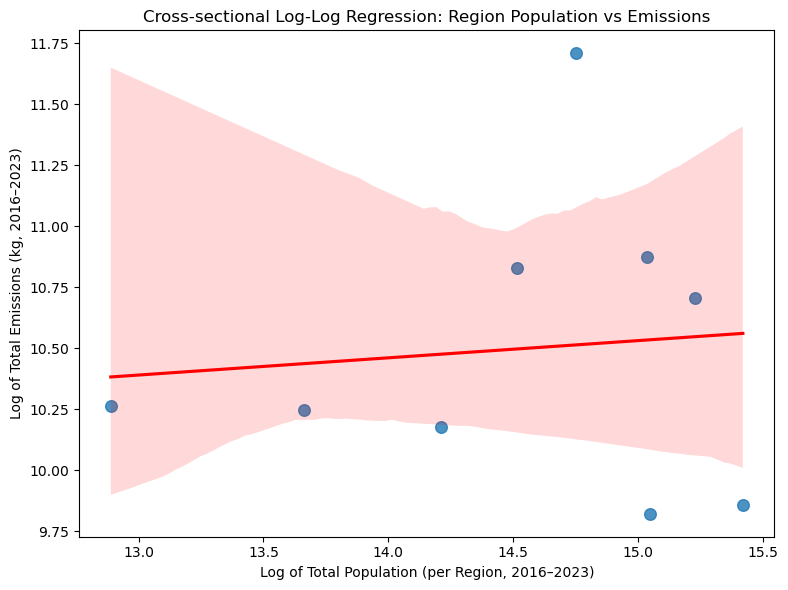

=== Region-Level Log-Log Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:          log_emissions   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.132
Method:                 Least Squares   F-statistic:                   0.06673
Date:                Fri, 04 Jul 2025   Prob (F-statistic):              0.804
Time:                        18:32:59   Log-Likelihood:                -7.5533
No. Observations:                   9   AIC:                             19.11
Df Residuals:                       7   BIC:                             19.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Sum pollution per region across all years
poll_df = full_df.copy()
poll_df = poll_df[poll_df["QUANTITY RELEASED (kg)"].notna()]
poll_df = poll_df[poll_df["QUANTITY RELEASED (kg)"] > 0]
poll_df = poll_df[poll_df["REGION"].str.strip() != "nan"]

poll_by_region = poll_df.groupby("REGION")["QUANTITY RELEASED (kg)"].sum().reset_index()

# 2. Build county-to-region mapping from pollution data
county_region_map = full_df[["COUNTY", "REGION"]].drop_duplicates().dropna()

# 3. Merge population with region using the county-to-region map
# Compute average population per county
pop_avg = pop_df_long.groupby("COUNTY")["Population"].mean().reset_index()

# Join to get region for each county
pop_with_region = pd.merge(pop_avg, county_region_map, on="COUNTY", how="inner")

# Sum population per region
region_pop = pop_with_region.groupby("REGION")["Population"].sum().reset_index()

# 4. Merge pollution and population data by REGION
merged = pd.merge(poll_by_region, region_pop, on="REGION", how="inner")

# Remove zeros or negatives for log
merged = merged[(merged["Population"] > 0) & (merged["QUANTITY RELEASED (kg)"] > 0)]

# 5. Log-transform
merged["log_population"] = np.log(merged["Population"])
merged["log_emissions"] = np.log(merged["QUANTITY RELEASED (kg)"])

# 6. Plot
plt.figure(figsize=(8, 6))
sns.regplot(
    x="log_population",
    y="log_emissions",
    data=merged,
    scatter_kws={'alpha': 0.8, 's': 70},
    line_kws={'color': 'red'}
)
plt.xlabel("Log of Total Population (per Region, 2016–2023)")
plt.ylabel("Log of Total Emissions (kg, 2016–2023)")
plt.title("Cross-sectional Log-Log Regression: Region Population vs Emissions")
plt.tight_layout()
plt.show()

# 7. Regression
X = sm.add_constant(merged["log_population"])
y = merged["log_emissions"] 
model = sm.OLS(y, X).fit()

print("=== Region-Level Log-Log Regression Summary ===")
print(model.summary())


                          PanelOLS Estimation Summary                           
Dep. Variable:          log_emissions   R-squared:                        0.0069
Estimator:                   PanelOLS   R-squared (Between):             -24.069
No. Observations:                  72   R-squared (Within):               0.0646
Date:                Fri, Jul 04 2025   R-squared (Overall):             -24.056
Time:                        18:30:31   Log-likelihood                    22.013
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.3809
Entities:                           9   P-value                           0.5397
Avg Obs:                       8.0000   Distribution:                    F(1,55)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             0.3809
                            

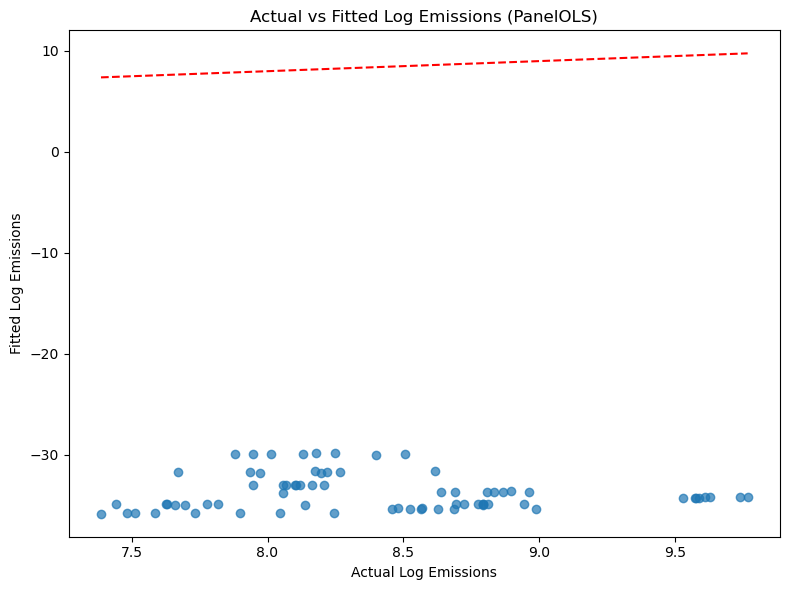

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS


# === 1. Region-wise annual emissions ===
poll_df = full_df.copy()
poll_df = poll_df[poll_df["QUANTITY RELEASED (kg)"].notna()]
poll_df = poll_df[poll_df["QUANTITY RELEASED (kg)"] > 0]
poll_df = poll_df[poll_df["REGION"].notna()]
poll_df = poll_df[poll_df["REGION"].str.strip() != "nan"]  # Remove blanks

region_emissions = poll_df.groupby(["REGION", "YEAR"])["QUANTITY RELEASED (kg)"].sum().reset_index()
region_emissions = region_emissions.rename(columns={
    "REGION": "Region",
    "YEAR": "Year",
    "QUANTITY RELEASED (kg)": "Emissions"
})

# === 2. COUNTY to REGION mapping ===
county_region_map = full_df[["COUNTY", "REGION"]].drop_duplicates()
county_region_map = county_region_map[county_region_map["REGION"].notna()]
county_region_map = county_region_map[county_region_map["REGION"].str.strip() != ""]
county_region_map.columns = ["COUNTY", "Region"]

region_emissions = poll_df.groupby(["REGION", "YEAR"])["QUANTITY RELEASED (kg)"].sum().reset_index()
region_emissions = region_emissions.rename(columns={
    "REGION": "Region",
    "YEAR": "Year",
    "QUANTITY RELEASED (kg)": "Emissions"
})

# === 2. COUNTY to REGION mapping ===
county_region_map = full_df[["COUNTY", "REGION"]].drop_duplicates()
county_region_map.columns = ["COUNTY", "Region"]

# === 3. Add REGION info to population data ===
pop_region = pd.merge(pop_df_long, county_region_map, on="COUNTY", how="left")
pop_region = pop_region.dropna(subset=["Region", "Population"])

# === 4. Region-wise annual population ===
region_population = pop_region.groupby(["Region", "Year"])["Population"].sum().reset_index()

# === 5. Merge emissions and population ===
panel_df = pd.merge(region_emissions, region_population, on=["Region", "Year"], how="inner")

# === 6. Drop zeros and take logs ===
panel_df = panel_df[(panel_df["Population"] > 0) & (panel_df["Emissions"] > 0)]
panel_df["log_population"] = np.log(panel_df["Population"])
panel_df["log_emissions"] = np.log(panel_df["Emissions"])

# === 7. Set panel index ===
panel_df = panel_df.set_index(["Region", "Year"]).sort_index()

# === 8. Fit PanelOLS with Region and Time Fixed Effects ===
model = PanelOLS.from_formula("log_emissions ~ log_population + EntityEffects + TimeEffects", data=panel_df)
res = model.fit()
print(res.summary)

# === 9. Plot Actual vs Fitted Log Emissions ===
panel_df["fitted_log_emissions"] = res.fitted_values
plt.figure(figsize=(8, 6))
plt.scatter(panel_df["log_emissions"], panel_df["fitted_log_emissions"], alpha=0.7)
plt.plot([panel_df["log_emissions"].min(), panel_df["log_emissions"].max()],
         [panel_df["log_emissions"].min(), panel_df["log_emissions"].max()],
         color='red', linestyle='--')
plt.xlabel("Actual Log Emissions")
plt.ylabel("Fitted Log Emissions")
plt.title("Actual vs Fitted Log Emissions (PanelOLS)")
plt.tight_layout()
plt.show()


In [18]:
poll_df['REGION'].unique()

array(['East Midlands', 'East of England', 'London', 'North East',
       'North West', 'South East', 'South West', 'West Midlands',
       'Yorkshire and The Humber', 'nan'], dtype=object)